In [1]:
# SPDX-FileCopyrightText: 2020 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad is not installed 
!pip install noloadj --quiet


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<H1>NoLoad tutorial</H1>
Based on test functions: <A href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Constrained mono-objective optimization 2</H2>

<img src=".\img\bar.png"/>
<img src=".\img\Rosenbrock.PNG"/>

<H3>function definition</H3>

In [2]:
def rosenbrock(x,y):
    fobj=(1-x)*(1-x)+100*(y-x*x)**2
    ctr1=(x-1)**3-y+1
    ctr2=x+y-2
    return locals().items()

<H3>plot function</H3>

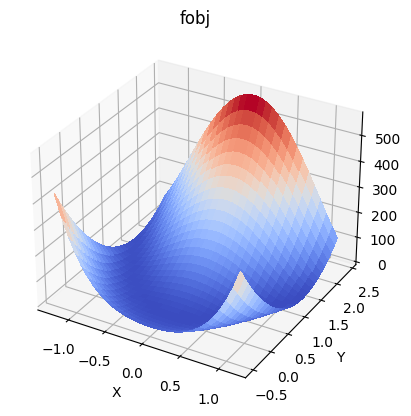

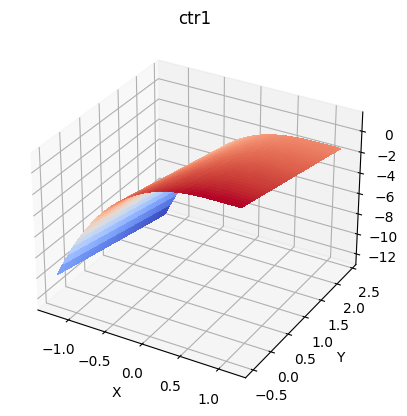

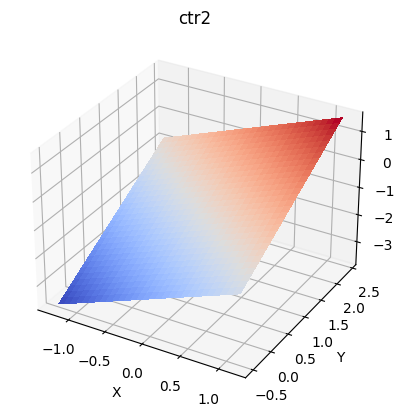

In [3]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(rosenbrock, [[-1.25,1.25],[-0.5,2.5]], outNames = ['fobj','ctr1','ctr2'])


<H3>optimize using NoLoad</H3>

Optimization terminated successfully 	(Exit mode 0)
			Current function value: 1.054838077805404e-09
			Iterations: 7
			Function evaluations: 8
			Gradient evaluations: 7
{'x': 0.9999989179915303, 'y': 1.0000010820084695}
{'fobj': 1.054838077805404e-09, 'ctr1': -1.0820084694884713e-06, 'ctr2': -2.220446049250313e-16}


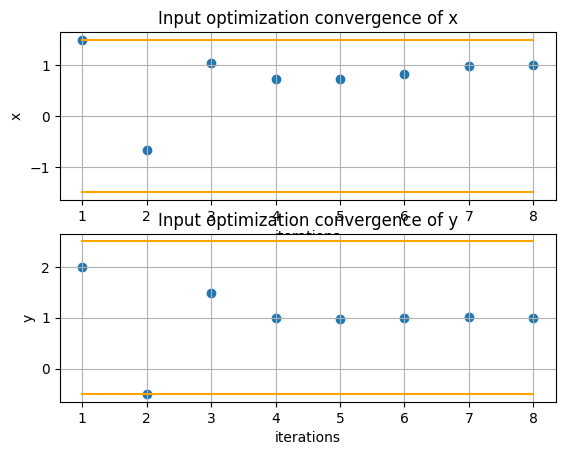

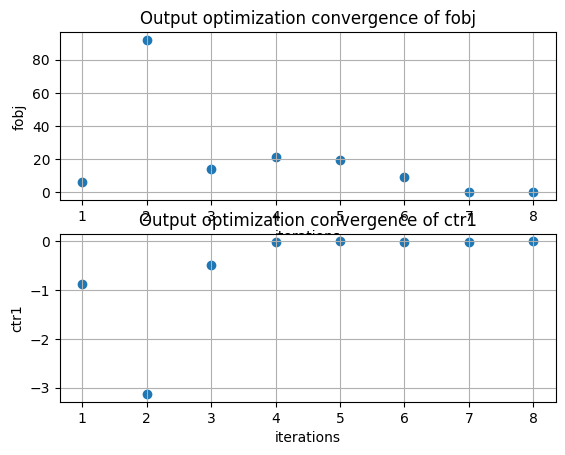

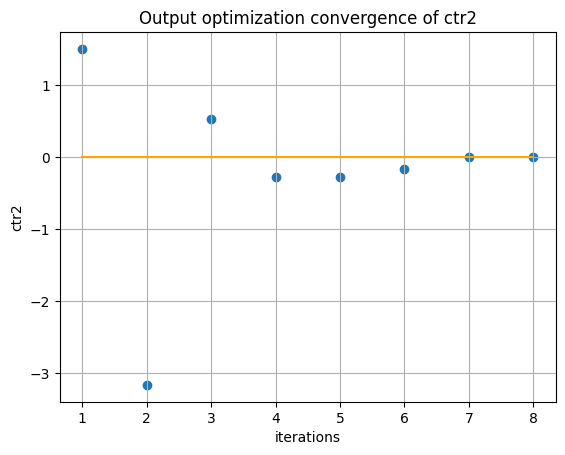

In [4]:
#Optimize with one equality constraint and an inequality one
from noloadj.optimization.optimProblem import Spec, OptimProblem


spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]}, eq_cstr={'ctr1':0},
            ineq_cstr={'ctr2':[None, 0]})


optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
result.plotResults(['fobj','ctr1','ctr2'])

In [5]:
#It is also possible to iterate by yourself to get results
for name, value in result.getLastInputs().items():
    print(name, '  \t =', value)
for name, value in result.getLastOutputs().items():
    print(name, '  \t =', value)

x   	 = 0.9999989179915303
y   	 = 1.0000010820084695
fobj   	 = 1.054838077805404e-09
ctr1   	 = -1.0820084694884713e-06
ctr2   	 = -2.220446049250313e-16


Optimization terminated successfully 	(Exit mode 0)
			Current function value: 5.049499362308987e-07
			Iterations: 8
			Function evaluations: 10
			Gradient evaluations: 8
{'x': 0.9999644963478659, 'y': 0.9999999650367539}
{'fobj': 5.049499362308987e-07, 'ctr1': 3.496320133411501e-08, 'ctr2': -3.5538615380303895e-05}


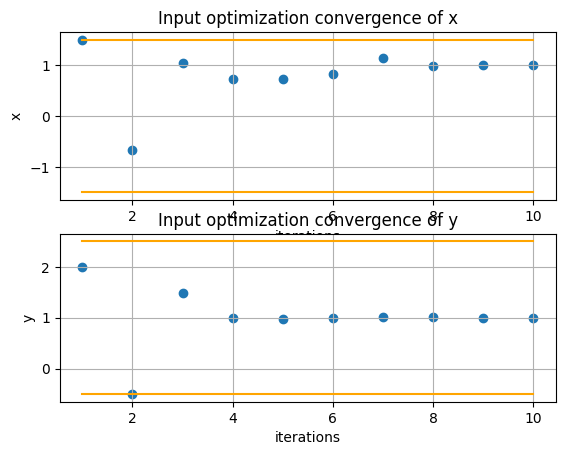

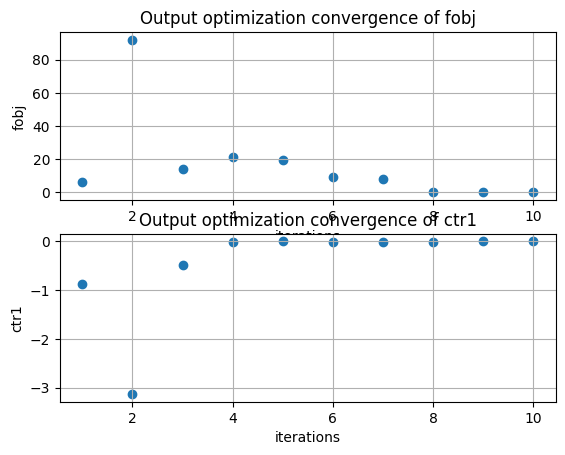

In [6]:
# Optimize with one equality constraint and the other one as FreeOutputs
spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]},
            eq_cstr={'ctr1': 0},freeOutputs=['ctr2'])

optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
result.plotResults(['fobj','ctr1'])

<H3>Rosenbrock function with vectorial constraints</H3>

In [7]:
def rosenbrock(x,y):
    fobj=(1-x)*(1-x)+100*(y-x*x)**2
    ctr=[(x-1)**3-y+1 , x+y-2]
    return locals().items()

In [9]:
#Optimize with vectorial inequality constraints
spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]},
            ineq_cstr={'ctr':[[None, 0],[None, 0]]})

optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
#result.plotResults(['fobj','ctr']) 

Optimization terminated successfully 	(Exit mode 0)
			Current function value: 3.226335903335865e-05
			Iterations: 5
			Function evaluations: 9
			Gradient evaluations: 5
{'x': 1.0001892191268213, 'y': 0.9998107808731737}
{'fobj': 3.226335903335865e-05, 'ctr': [0.0001892191336011484, -4.884981308350689e-15]}


In [10]:
#Optimize with vectorial equality constraints
spec = Spec(variables={'x':2.0, 'y':2.0},
            bounds={'x':[-1.5, 1.5],'y':[-0.5, 2.5]},
            objectives={'fobj':[0.,15.]},
            eq_cstr={'ctr':[0,0]})

optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
#result.plotResults(['fobj','ctr']) 


Optimization terminated successfully 	(Exit mode 0)
			Current function value: 9.91466140713524e-11
			Iterations: 4
			Function evaluations: 4
			Gradient evaluations: 4
{'x': 1.0000003317236996, 'y': 0.9999996682763006}
{'fobj': 9.91466140713524e-11, 'ctr': [3.317236993982675e-07, 0.0]}


In [11]:
# Rosenbrock function with vectorial constraints and inputs
def rosenbrock(X):
    x,y=X[0],X[1]
    fobj=(1-x)*(1-x)+100*(y-x*x)**2
    ctr=[(x-1)**3-y+1 , x+y-2]
    return locals().items()


In [12]:
#Optimize with vectorial inequality constraints
spec = Spec(variables={'X':[2.0,2.0]},
            bounds={'X':[[-1.5, 1.5],[-0.5, 2.5]]},
            objectives={'fobj':[0.,15.]},
            ineq_cstr={'ctr':[[None, 0],[None, 0]]})

optim = OptimProblem(model=rosenbrock, specifications=spec)
result = optim.run()

result.printResults()
#result.plotResults(['fobj','ctr'])


Optimization terminated successfully 	(Exit mode 0)
			Current function value: 3.226335903335865e-05
			Iterations: 5
			Function evaluations: 9
			Gradient evaluations: 5
{'X': [[1.0001892191268213, 0.9998107808731737]]}
{'fobj': 3.226335903335865e-05, 'ctr': [0.0001892191336011484, -4.884981308350689e-15]}
